# Семинар 9. Numpy_3 (решение задач)

1. Найти длину ломаной линии


2. Сгенерировать шахматную доску размера NxN с ячейками размера MxM


3. Построить триангуляцию области заданной формы

    3.1. Вычислить центры и площади треугольников
    
    3.2. Удалить треугольники по условию


4. Какое преобразование пространства задает линейный оператор с симметричной матрицей (2х2)?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Найти длину ломаной линии

Часто встречаются задачи, где функцию невозможно задать аналитически, а только вычислить ее в некоторых точках численно. В этом случае мы имеем дело с функцией, заданной таблично. График функции в этом случае строится как график кусочно-линейной функции, т.е. упорядоченный набор отрезков, соединяющих предыдущую точку со следующей. **Как вычислить длину такой линии, не прибегая к циклам Python**?


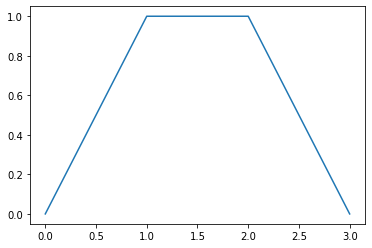

In [5]:
arr = np.array([[0., 0.],
                [1., 1.],
                [2., 1.],
                [3., 0.]])

plt.plot(arr[:, 0], arr[:, 1])

In [6]:
1 + 2*2**0.5

3.8284271247461903

In [8]:
np.linalg.norm?

In [10]:
np.linalg.norm(arr[1:] - arr[:-1], axis=1).sum()

3.82842712474619

In [12]:
t = np.linspace(0, 12*np.pi, 2000)
x = np.sin(t)*(np.e**np.cos(t) - 2*np.cos(4*t) + np.sin(t/12)**5)
y = np.cos(t)*(np.e**np.cos(t) - 2*np.cos(4*t) + np.sin(t/12)**5)
arr = np.column_stack((x, y))
arr.shape, np.linalg.norm(arr[1:] - arr[:-1], axis=1).sum()

((2000, 2), 217.02388146684666)

## 2. Сгенерировать шахматную доску размера NxN с ячейками размера MxM

Задача, которую можно решить различными способами. В ней можно проявить ваш творческий потенциал.

In [16]:
np.repeat(np.array([[1, 2, 3]]), 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [18]:
np.tile([1, 2, 3], (3, 2))

array([[1, 2, 3, 1, 2, 3],
       [1, 2, 3, 1, 2, 3],
       [1, 2, 3, 1, 2, 3]])

In [41]:
N, M = 21, 5

In [42]:
#0, 0, 1, 1, 2, 2, 3, 3, ...

In [43]:
#0, 1, 2, 3, 4, 5, 6, 7, ...

In [44]:
x = (np.arange(N) // M)
x

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4],
      dtype=int32)

In [45]:
arr = (x[:, None] + x) % 2

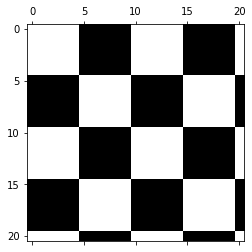

In [46]:
plt.spy(arr);

## 3. Построить триангуляцию области заданной формы

Такая задача встречается при решении различных задач методом конечных элементов. В этом методе искомая непрерывная функция заменяется на сумму кусочных функций, определенных на отдельных элементах. Исходная область может быть сложной формы, в то время как каждый элемент имеет простую форму (например, треугольник).

Пусть задана прямоугольная область с круглым вырезом.
Для разбиения на треугольники будем использовать метод триангуляции Делоне. Реализация этого метода присутствует в библиотеке `scipy.spatial`.

Для построения такой триангуляции необходимо:
- построить разбиение границы
- сгенерировать внутренние узлы
- применить реализацию метода Делоне

## 3.1. Вычислить центры и площади треугольников

Разброс площадей треугольников характеризует качество триангуляции.

Центры треугольников необходимы для удаления лишних треугольников.

## 4. Какое преобразование пространства задает линейный оператор с симметричной матрицей (2х2)?

In [85]:
S = np.array([[2., 1.5],
              [1.5, 3]])
S

array([[2. , 1.5],
       [1.5, 3. ]])

In [95]:
alpha = np.radians(np.arange(0, 360, 1))
n = np.row_stack((np.cos(alpha), np.sin(alpha)))
n.shape

(2, 360)

(-1.1, 1.1, -1.1, 1.1)

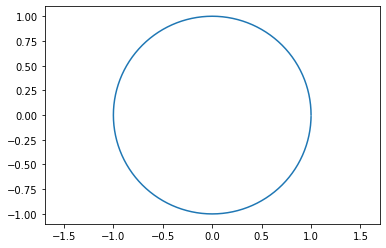

In [104]:
plt.plot(*n, '-')
plt.axis('equal')

In [97]:
S.shape, n.shape

((2, 2), (2, 360))

In [100]:
t = S @ n

(-2.749992910304924,
 2.7499929103049237,
 -3.6894058543918664,
 3.689405854391866)

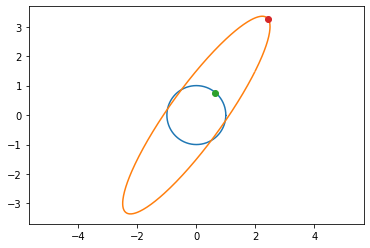

In [108]:
plt.plot(*n, '-')
plt.plot(*t, '-')
k = 50
plt.plot(*n[:,k], 'o')
plt.plot(*t[:,k], 'o')
plt.axis('equal')

In [ ]:
S @ v = lambda * v

In [110]:
vals, vecs = np.linalg.eig(S)

In [111]:
vecs[:,0] @ vecs[:,1]

0.0

## 5. Решение задачи [`Four to the floor`](https://py.checkio.org/en/mission/four-to-the-floor/)


Необходимо написать функцию `is_covered(room, sensors)`, параметрами которой являются:
- `room` - размеры прямоугольной комнаты (список из двух чисел)
- `sensors` - координаты и радиусы действия датчиков (список из списков по 3 числа)

Функция должна вернуть `True`, если комната полностью просматривается сенсорами, иначе - `False`.

In [70]:
from numba import njit

In [71]:
@njit(fastmath = True)
def surface(point, sensors):
    v = sensors[:, :2] - point
    d = np.sum(v**2, axis=1)**0.5
    return np.max(sensors[:, -1] - d)

In [48]:
from fttf_tests import TESTS

(0, 0) 0
(0, 1000) 0
(3000, 0) 2
(3000, 1000) 2
(2510.89253, 497.52537) 4
(2810.526171, 719.297522) 4
(1613.786709, 588.740352) 3
(1604.796721, 571.500881) 2
(1635.403725, 635.069275) 3
(1613.387578, 591.074947) 3
(2327.479096, 995.698922) 3
(2916.580311, 513.707019) 4
(3000, 750.0) 3
(2419.052498, 0) 3
(1698.4359709999999, 1000) 2
(101.564029, 1000) 1
(1966.9048109999999, 0) 2
(1633.484861, 1000) 2
(3000, 585.424869) 3
(2329.190076, 1000) 2
(2882.455532, 0) 3
(1617.544468, 0) 1
(2250.0, 1000) 2
(0, 0) 2
(0, 400) 2
(400, 0) 0
(400, 400) 2
(193.44112, 80.646722) 5
(237.910231, 347.461386) 5
(258.411139, 104.018565) 6
(319.23592, 205.3932) 6
(51.765058, 163.823494) 4
(294.571575, 139.542843) 7
(139.551931, 354.029675) 4
(85.063454, 322.893402) 4
(261.320208, 106.039377) 7
(176.679792, 359.960624) 4
(140.003879, 198.885872) 5
(338.303813, 44.65259) 4
(267.500526, 356.664559) 4
(345.048492, 46.472695) 3
(160.015774, 277.48817) 5
(226.543983, 187.248014) 7
(315.103076, 111.340221) 6
(271.61

In [49]:
for key, value in TESTS.items():
    print(key, len(value))

Basics 10
Extra 11
Randoms 10


In [50]:
from scipy.optimize import minimize

In [78]:
def is_covered(room, sensors):
    W, H = room
    sensors = np.array(sensors)
    
    bounds = ((0, W), (0, H))
    N = 100
    rng = np.random.default_rng()
    pts = np.column_stack((rng.uniform(0, W, size=N),
                           rng.uniform(0, H, size=N)))
    
    for p in pts:
        res = minimize(surface, p, args=(sensors,), 
                       method='SLSQP', bounds=bounds, tol=1e-2)
        if res.fun < 0:
            return False
        
    return True

In [84]:
for name, group in TESTS.items():
    print(name)
    for test in group:
        print(test)
        assert is_covered(*test['input']) == test['answer']

Basics
{'input': [[200, 150], [[100, 75, 130]]], 'answer': True}
{'input': [[200, 150], [[50, 75, 100], [150, 75, 100]]], 'answer': True}
{'input': [[200, 150], [[50, 75, 100], [150, 25, 50], [150, 125, 50]]], 'answer': False}
{'input': [[200, 150], [[100, 75, 100], [0, 40, 60], [0, 110, 60], [200, 40, 60], [200, 110, 60]]], 'answer': True}
{'input': [[200, 150], [[100, 75, 100], [0, 40, 50], [0, 110, 50], [200, 40, 50], [200, 110, 50]]], 'answer': False}
{'input': [[200, 150], [[100, 75, 110], [105, 75, 110]]], 'answer': False}
{'input': [[200, 150], [[100, 75, 110], [105, 75, 20]]], 'answer': False}
{'input': [[3, 1], [[1, 0, 2], [2, 1, 2]]], 'answer': True}
{'input': [[30, 10], [[0, 10, 10], [10, 0, 10], [20, 10, 10], [30, 0, 10]]], 'answer': True}
{'input': [[30, 10], [[0, 10, 8], [10, 0, 7], [20, 10, 9], [30, 0, 10]]], 'answer': False}
Extra
{'input': [[8, 6], [[4, 3, 5]]], 'answer': True}
{'input': [[2000, 1000], [[0, 0, 500], [500, 0, 500], [1000, 0, 500], [1500, 0, 500], [2000,